In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

# STEP REVISION: Understand your data AND **your model**

In [2]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.

In [3]:
df = pd.read_csv('data/titanic.csv')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


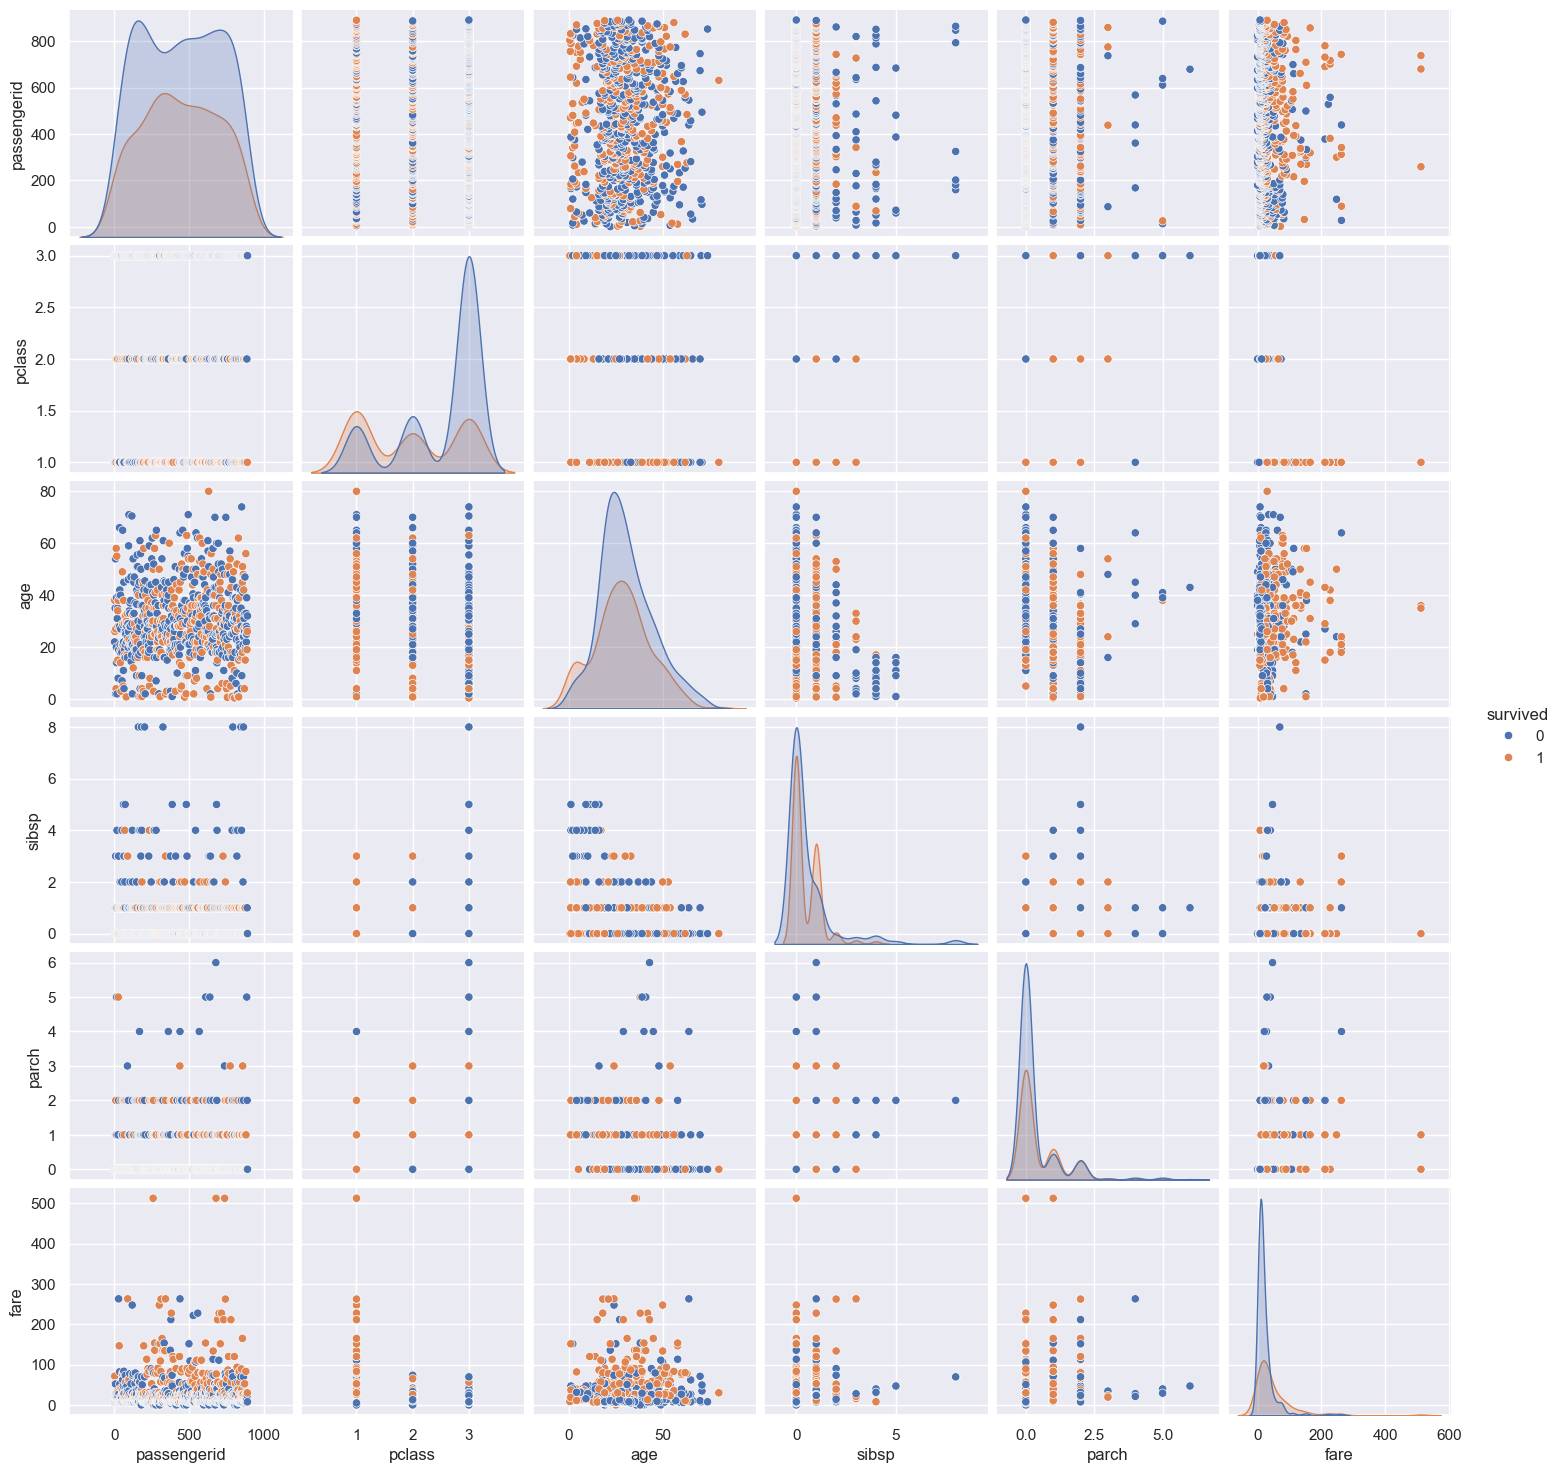

In [4]:
sns.pairplot(df, hue='survived');

In [5]:
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# #2 Select and engineer features.
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Select our features
1. Define our `X` and `y`
1. Split into trainig and testing features

In [8]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`
df = pd.get_dummies(df, columns=['sex', 'pclass', 'embarked'], drop_first=True)

In [9]:
# Sklearn will throw an error if you have literal NAN's 
# You have to fill it with a value that is outside of the range of its current value.
df['age'] = df['age'].fillna(-999)

In [10]:
independent_variables = ['fare', 'age',  
                     'sex_male', 'pclass_2', 'pclass_3',  
                     'sibsp', 'parch', 'embarked_Q','embarked_S']

dependent_variable = 'survived'

# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate our model using accuracy, precision, recall, and f1 scores. 
5. Visualize our Decision Tree using provided code. 


Shape of our X_train data: (712, 9) 
Shape of our y_test data: (179,)
Accuracy Score: 0.787709
Precision Score: 0.781818
Recall Score: 0.623188
F1 Score: 0.693548
AUC Score: 0.828590
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       110
           1       0.78      0.62      0.69        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



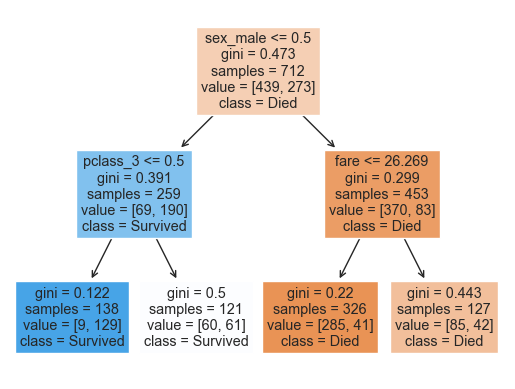

In [11]:
model = DecisionTreeClassifier(max_depth=2)

X = df[independent_variables]

y = df[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=45)

print('Shape of our X_train data:', X_train.shape, '\nShape of our y_test data:', y_test.shape)


model.fit(X_train,y_train)

y_pred = model.predict(X_test)


## Eval Model 
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)


# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)


# Produce classification Report
print(classification_report(y_test, y_pred))

# Plot Tree
class_names=['Died', 'Survived']
plot_tree(model, feature_names=independent_variables, class_names=class_names, filled=True);

# Lets increase our tree max_depth


Accuracy Score: 0.843575
Precision Score: 0.886792
Recall Score: 0.681159
F1 Score: 0.770492
AUC Score: 0.857642
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       110
           1       0.89      0.68      0.77        69

    accuracy                           0.84       179
   macro avg       0.86      0.81      0.83       179
weighted avg       0.85      0.84      0.84       179



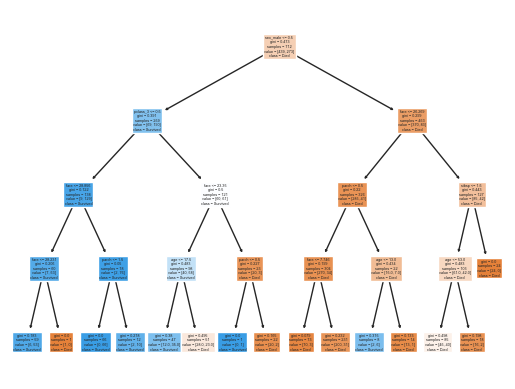

In [12]:
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


## Eval Model 
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)


# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)


# Produce classification Report
print(classification_report(y_test, y_pred))

# Plot Tree
class_names=['Died', 'Survived']
plot_tree(model, feature_names=independent_variables, class_names=class_names, filled=True);

# Lets Increase max_depth even further...
* What happens to our evaluation scores when we increase max_depth to be 100?
* What reason do you think the changes in scores happened..?

In [13]:
model = tree.DecisionTreeClassifier(max_depth=1000)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

## Eval Model 
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)


# Produce classification Report
print(classification_report(y_test, y_pred))


Accuracy Score: 0.787709
Precision Score: 0.731343
Recall Score: 0.710145
F1 Score: 0.720588
AUC Score: 0.779315
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



### Why did f1-score and accuracy go done with more depth?

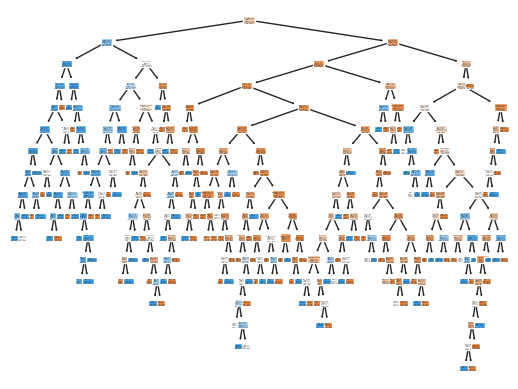

In [14]:
# This will take a while because its a HUGE tree now. 
class_names=['Died', 'Survived']
plot_tree(model, feature_names=independent_variables, class_names=class_names, filled=True);

## Incorrect Hyper-Parameters (aka model options, aka the knobs you can adjust)
* You can have the worlds prettiest sound, but if your stereo knobs are all messed up, its going to sound terrible. 
* 
```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```

![img](https://i.ebayimg.com/images/g/kuUAAOSww3Rh6Hch/s-l1600.jpg)

![img](images/audio-mixer.png)

In [13]:
# DecisionTreeClassifier??

# To pick the right parameters, you need to know how to read documentation.

Below is the exact same thing as you will see in [the official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

However, if you do `DecisionTreeClassifier??` in your jupyter notebook, it will print the docs for you.  


# Reading Documentation for the Decision Tree Classifier.
Below is a list of all the parameters you can adjust within a Decision Tree.  Instead of having to manually go and train N new models with every permutation, you can use the GridSearch function.

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)


Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

    .. versionchanged:: 0.18
       Added float values for fractions.

min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

    .. versionchanged:: 0.18
       Added float values for fractions.

min_weight_fraction_leaf : float, default=0.0
    The minimum weighted fraction of the sum total of weights (of all
    the input samples) required to be at a leaf node. Samples have
    equal weight when sample_weight is not provided.

max_features : int, float or {"auto", "sqrt", "log2"}, default=None
    The number of features to consider when looking for the best split:

        - If int, then consider `max_features` features at each split.
        - If float, then `max_features` is a fraction and
          `int(max_features * n_features)` features are considered at each
          split.
        - If "auto", then `max_features=sqrt(n_features)`.
        - If "sqrt", then `max_features=sqrt(n_features)`.
        - If "log2", then `max_features=log2(n_features)`.
        - If None, then `max_features=n_features`.

    Note: the search for a split does not stop until at least one
    valid partition of the node samples is found, even if it requires to
    effectively inspect more than ``max_features`` features.

random_state : int, RandomState instance, default=None
    Controls the randomness of the estimator. The features are always
    randomly permuted at each split, even if ``splitter`` is set to
    ``"best"``. When ``max_features < n_features``, the algorithm will
    select ``max_features`` at random at each split before finding the best
    split among them. But the best found split may vary across different
    runs, even if ``max_features=n_features``. That is the case, if the
    improvement of the criterion is identical for several splits and one
    split has to be selected at random. To obtain a deterministic behaviour
    during fitting, ``random_state`` has to be fixed to an integer.
    See :term:`Glossary <random_state>` for details.

max_leaf_nodes : int, default=None
    Grow a tree with ``max_leaf_nodes`` in best-first fashion.
    Best nodes are defined as relative reduction in impurity.
    If None then unlimited number of leaf nodes.

min_impurity_decrease : float, default=0.0
    A node will be split if this split induces a decrease of the impurity
    greater than or equal to this value.

    The weighted impurity decrease equation is the following::

        N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)

    where ``N`` is the total number of samples, ``N_t`` is the number of
    samples at the current node, ``N_t_L`` is the number of samples in the
    left child, and ``N_t_R`` is the number of samples in the right child.

    ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
    if ``sample_weight`` is passed.

    .. versionadded:: 0.19

min_impurity_split : float, default=0
    Threshold for early stopping in tree growth. A node will split
    if its impurity is above the threshold, otherwise it is a leaf.

    .. deprecated:: 0.19
       ``min_impurity_split`` has been deprecated in favor of
       ``min_impurity_decrease`` in 0.19. The default value of
       ``min_impurity_split`` has changed from 1e-7 to 0 in 0.23 and it
       will be removed in 0.25. Use ``min_impurity_decrease`` instead.

class_weight : dict, list of dict or "balanced", default=None
    Weights associated with classes in the form ``{class_label: weight}``.
    If None, all classes are supposed to have weight one. For
    multi-output problems, a list of dicts can be provided in the same
    order as the columns of y.

    Note that for multioutput (including multilabel) weights should be
    defined for each class of every column in its own dict. For example,
    for four-class multilabel classification weights should be
    [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of
    [{1:1}, {2:5}, {3:1}, {4:1}].

    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``

    For multi-output, the weights of each column of y will be multiplied.

    Note that these weights will be multiplied with sample_weight (passed
    through the fit method) if sample_weight is specified.

presort : deprecated, default='deprecated'
    This parameter is deprecated and will be removed in v0.24.

    .. deprecated:: 0.22

ccp_alpha : non-negative float, default=0.0
    Complexity parameter used for Minimal Cost-Complexity Pruning. The
    subtree with the largest cost complexity that is smaller than
    ``ccp_alpha`` will be chosen. By default, no pruning is performed. See
    :ref:`minimal_cost_complexity_pruning` for details.

    .. versionadded:: 0.22
```

[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)


# Programtically tune your model and find the best hyper-parameters using GridSearchCV and RandomSearchCV, 
### Check out TA Steven's notebook in the TA-Tips Folder on how to do this. 

# Interpreting the results using feature_importance

In [15]:
# Now lets look at our feature importances
my_dict = {'feature_importance': model.feature_importances_,
           'feature':independent_variables }
feature_imp = pd.DataFrame.from_dict( my_dict ).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
2,0.310196,sex_male
0,0.269799,fare
1,0.218170,age
4,0.078450,pclass_3
5,0.058237,sibsp
6,0.035930,parch
8,0.020616,embarked_S
3,0.008545,pclass_2
7,0.000056,embarked_Q


# Now onto Random Forests...

In [22]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_co

In [31]:
# Initialize an empty Random Forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(oob_score=True)

model.fit(X_train, y_train)

# Now lets evaluate our model
y_pred = model.predict(X_test)


## Eval Model 
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)


# Produce classification Report
print(classification_report(y_test, y_pred))

Accuracy Score: 0.793296
Precision Score: 0.742424
Recall Score: 0.710145
F1 Score: 0.725926
AUC Score: 0.873781
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.71      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [32]:
print('oob accuracy', model.oob_score_)
print('oob error rate', 1 - model.oob_score_)

oob accuracy 0.7921348314606742
oob error rate 0.2078651685393258


### Here is a cool way of seeing how many features to split on using oob scores [link](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html)
![img](https://scikit-learn.org/stable/_images/sphx_glr_plot_ensemble_oob_001.png)

In [33]:
print(np.sqrt(64))

print(np.log2(64))

8.0
6.0


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.
    Note: this parameter is tree-specific.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

    .. versionchanged:: 0.18
       Added float values for fractions.

min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

    .. versionchanged:: 0.18
       Added float values for fractions.

min_weight_fraction_leaf : float, default=0.0
    The minimum weighted fraction of the sum total of weights (of all
    the input samples) required to be at a leaf node. Samples have
    equal weight when sample_weight is not provided.

max_features : {"auto", "sqrt", "log2"}, int or float, default="auto"
    The number of features to consider when looking for the best split:

    - If int, then consider `max_features` features at each split.
    - If float, then `max_features` is a fraction and
      `int(max_features * n_features)` features are considered at each
      split.
    - If "auto", then `max_features=sqrt(n_features)`.
    - If "sqrt", then `max_features=sqrt(n_features)` (same as "auto").
    - If "log2", then `max_features=log2(n_features)`.
    - If None, then `max_features=n_features`.

    Note: the search for a split does not stop until at least one
    valid partition of the node samples is found, even if it requires to
    effectively inspect more than ``max_features`` features.

max_leaf_nodes : int, default=None
    Grow trees with ``max_leaf_nodes`` in best-first fashion.
    Best nodes are defined as relative reduction in impurity.
    If None then unlimited number of leaf nodes.

min_impurity_decrease : float, default=0.0
    A node will be split if this split induces a decrease of the impurity
    greater than or equal to this value.

    The weighted impurity decrease equation is the following::

        N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)

    where ``N`` is the total number of samples, ``N_t`` is the number of
    samples at the current node, ``N_t_L`` is the number of samples in the
    left child, and ``N_t_R`` is the number of samples in the right child.

    ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
    if ``sample_weight`` is passed.

    .. versionadded:: 0.19

min_impurity_split : float, default=None
    Threshold for early stopping in tree growth. A node will split
    if its impurity is above the threshold, otherwise it is a leaf.

    .. deprecated:: 0.19
       ``min_impurity_split`` has been deprecated in favor of
       ``min_impurity_decrease`` in 0.19. The default value of
       ``min_impurity_split`` has changed from 1e-7 to 0 in 0.23 and it
       will be removed in 0.25. Use ``min_impurity_decrease`` instead.


bootstrap : bool, default=True
    Whether bootstrap samples are used when building trees. If False, the
    whole dataset is used to build each tree.

oob_score : bool, default=False
    Whether to use out-of-bag samples to estimate
    the generalization accuracy.

n_jobs : int, default=None
    The number of jobs to run in parallel. :meth:`fit`, :meth:`predict`,
    :meth:`decision_path` and :meth:`apply` are all parallelized over the
    trees. ``None`` means 1 unless in a :obj:`joblib.parallel_backend`
    context. ``-1`` means using all processors. See :term:`Glossary
    <n_jobs>` for more details.

random_state : int or RandomState, default=None
    Controls both the randomness of the bootstrapping of the samples used
    when building trees (if ``bootstrap=True``) and the sampling of the
    features to consider when looking for the best split at each node
    (if ``max_features < n_features``).
    See :term:`Glossary <random_state>` for details.

verbose : int, default=0
    Controls the verbosity when fitting and predicting.

warm_start : bool, default=False
    When set to ``True``, reuse the solution of the previous call to fit
    and add more estimators to the ensemble, otherwise, just fit a whole
    new forest. See :term:`the Glossary <warm_start>`.

class_weight : {"balanced", "balanced_subsample"}, dict or list of dicts,             default=None
    Weights associated with classes in the form ``{class_label: weight}``.
    If not given, all classes are supposed to have weight one. For
    multi-output problems, a list of dicts can be provided in the same
    order as the columns of y.

    Note that for multioutput (including multilabel) weights should be
    defined for each class of every column in its own dict. For example,
    for four-class multilabel classification weights should be
    [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of
    [{1:1}, {2:5}, {3:1}, {4:1}].

    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``

    The "balanced_subsample" mode is the same as "balanced" except that
    weights are computed based on the bootstrap sample for every tree
    grown.

    For multi-output, the weights of each column of y will be multiplied.

    Note that these weights will be multiplied with sample_weight (passed
    through the fit method) if sample_weight is specified.

ccp_alpha : non-negative float, default=0.0
    Complexity parameter used for Minimal Cost-Complexity Pruning. The
    subtree with the largest cost complexity that is smaller than
    ``ccp_alpha`` will be chosen. By default, no pruning is performed. See
    :ref:`minimal_cost_complexity_pruning` for details.

    .. versionadded:: 0.22

max_samples : int or float, default=None
    If bootstrap is True, the number of samples to draw from X
    to train each base estimator.

    - If None (default), then draw `X.shape[0]` samples.
    - If int, then draw `max_samples` samples.
    - If float, then draw `max_samples * X.shape[0]` samples. Thus,
      `max_samples` should be in the interval `(0, 1)`.

    .. versionadded:: 0.22
            
```

In [27]:
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=independent_variables).sort_values(ascending=False)
feature_imp

fare          0.284413
sex_male      0.253250
age           0.249032
pclass_3      0.067206
sibsp         0.049207
parch         0.042885
embarked_S    0.023637
pclass_2      0.020163
embarked_Q    0.010207
dtype: float64